<a href="https://colab.research.google.com/github/Piyumi22/XAI/blob/main/SHAP_example_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#notes


https://viso.ai/deep-learning/explainable-ai/
2024 oct

https://www.datacamp.com/tutorial/explainable-ai-understanding-and-trusting-machine-learning-models

https://shap.readthedocs.io/en/latest/tabular_examples.html


2023 MAY 10

https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html



##Kolmogorov-Arnold Networks (KANs)
https://arxiv.org/abs/2404.19756 KANS

Inspired by the Kolmogorov-Arnold representation theorem, we propose Kolmogorov-Arnold Networks (KANs) as promising alternatives to Multi-Layer Perceptrons (MLPs). While MLPs have fixed activation functions on nodes ("neurons"), KANs have learnable activation functions on edges ("weights"). KANs have no linear weights at all -- every weight parameter is replaced by a univariate function parametrized as a spline. We show that this seemingly simple change makes KANs outperform MLPs in terms of accuracy and interpretability. For accuracy, much smaller KANs can achieve comparable or better accuracy than much larger MLPs in data fitting and PDE solving. Theoretically and empirically, KANs possess faster neural scaling laws than MLPs. For interpretability, KANs can be intuitively visualized and can easily interact with human users. Through two examples in mathematics and physics, KANs are shown to be useful collaborators helping scientists (re)discover mathematical and physical laws. In summary, KANs are promising alternatives for MLPs, opening opportunities for further improving today's deep learning models which rely heavily on MLPs.

##DATA SET IN EXLAINABILITY:
When checking the explainability of AI models, it's common to use the test data set. This is because the test data set contains data that the model hasn't seen during training, providing a more accurate representation of how the model performs on new, unseen data. By using the test data set, you can better understand how the model makes predictions and identify any potential biases or issues.

However, you can also use the training data set to gain insights into the model's behavior and ensure that it has learned the patterns correctly. In some cases, you might even use the entire data set to get a comprehensive view of the model's explainability.

In summary:

Test Data Set: Provides insights into the model's performance on new, unseen data.

Training Data Set: Helps understand the model's learning process and behavior.

Entire Data Set: Offers a comprehensive view of the model's explainability.

#MODELING

In [45]:
# Import necessary packages
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

##upload data

In [46]:
# from google.colab import drive
# drive.mount('/content/drive')

 target is ‘Outcome’. If it is 1, then we predict the patient to have diabetes and be healthy if it is 0.

In [47]:
# Step 1: Load the dataset from GitHub
github_url = "https://raw.githubusercontent.com/Piyumi22/XAI/main/diabetes.csv"
df = pd.read_csv(github_url)

# Display the first few rows
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



When you set the random_state value, you are telling the program to use the same sequence of random numbers every time it runs. This makes the results consistent and reproducible.

In [48]:
df = df.dropna()  # Drop missing values

##pandas profiling

In [49]:
# !pip install pandas_profiling

In [50]:
# from pandas_profiling import ProfileReport
# # Generate the profiling report
# profile = ProfileReport(df, title="Diabetes Dataset Report", explorative=True)

# # Display the report in the notebook
# profile.to_notebook_iframe()

##XGBoost
Key Features of XGBoost Classifier:
Gradient Boosting Algorithm:





* Combines the predictions of multiple weak learners (usually decision trees) to create a strong learner.
Boosting is an iterative process where each new tree corrects the errors of the previous trees.
Optimized for Speed and Performance:

* Highly efficient implementation of gradient boosting.
Optimized for both computational efficiency and model accuracy.
Support for Regularization:

* Includes L1 and L2 regularization to prevent overfitting.
Handles Missing Data:

* Automatically learns the best way to handle missing values during training.
Parallel and Distributed Computing:

* Supports multi-threading and distributed computing for large-scale datasets.
Tree Pruning:

* Uses a "maximum delta step" approach to prune trees, making it robust and accurate.
Custom Loss Functions:

* Allows for custom loss functions in addition to common ones like logistic loss (for binary classification).
Supports Feature Importance Visualization:

Provides built-in tools to interpret feature importance.


###Key Parameters of XGBClassifier:
- n_estimators: Number of trees (default: 100).
- learning_rate: Step size for updating weights (default: 0.3).
- max_depth: Maximum depth of a tree (default: 6).
- objective: Learning task (e.g., binary:logistic for binary classification).
- random_state: Seed for reproducibility.


In [51]:
# Step 2: Define features (X) and target (y)
# X contains all columns except the last one (features).
# y contains only the last column, which is the target variable ('Outcome').
X = df.iloc[:, :-1]  # Select all rows and all columns except the last
y = df.iloc[:, -1]   # Select all rows and only the last column

# Step 3: Split the dataset into training and testing sets
# Using 75% of the data for training and 25% for testing.
# Setting a fixed random_state ensures reproducibility of the split.
from sklearn.model_selection import train_test_split
# Split data into training (70%) and temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Split temp into validation (20%) and test (10%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=1/3, random_state=42)

# Step 4: Initialize the XGBoost classifier
# The `random_state` parameter ensures that the model's behavior is deterministic and reproducible.
from xgboost import XGBClassifier
model = XGBClassifier(random_state=42)

# Step 5: Train the XGBoost classifier on the training set
# The `.fit()` method trains the model using the training features (X_train) and the target (y_train).
model.fit(X_train, y_train)

# Step 6: Evaluate the model on the testing set
# The `.score()` method computes the accuracy of the model on the testing set (X_test and y_test).
# Accuracy is the proportion of correctly classified samples.
score = model.score(X_test, y_test)

# Print the accuracy score
print(f"Model Accuracy: {score:.2f}")  # Display the model's performance as a percentage


Model Accuracy: 0.73



#SHAP


In [52]:
# Import the SHAP library
import shap  # SHAP (SHapley Additive exPlanations) is used for model interpretability

# Step 1: Initialize the SHAP TreeExplainer
# TreeExplainer is specifically designed for tree-based models like XGBoost, LightGBM, or Random Forest.
# It takes the trained model as input to compute SHAP values.
explainer = shap.Explainer(model,X)

# Step 2: Compute SHAP values for the input data
# SHAP values explain the contribution of each feature to the model's predictions.
# Here, `X` is the input dataset (can be training or test data).
shap_values = explainer(X)


In [53]:
# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model, X_test)
shap_values_xgb = explainer_xgb(X_test)

##1. Summary Plot
The summary plot provides a global overview of feature importance and how they impact the model's predictions. It shows both the magnitude and direction of the SHAP values for all features across the dataset.


Interpretation:
The features are ranked by importance (top is most important).
The colors represent the feature value (red = high, blue = low).
The horizontal spread shows the range of SHAP values for each feature.


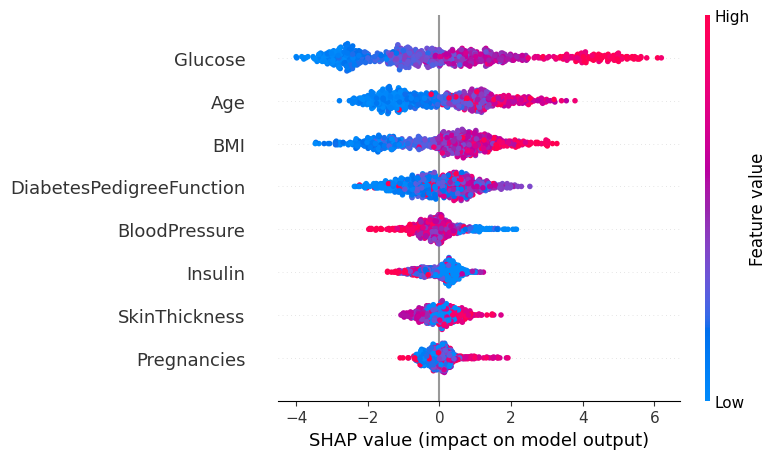

In [54]:
# Summary Plot
shap.summary_plot(shap_values, X, feature_names=X.columns)

##2. Dependence Plot
The dependence plot shows how a specific feature impacts the prediction, considering interactions with another feature.

Interpretation:
The x-axis shows the feature value.
The y-axis shows the SHAP value for the feature.
The color represents the value of an interacting feature (if applicable).

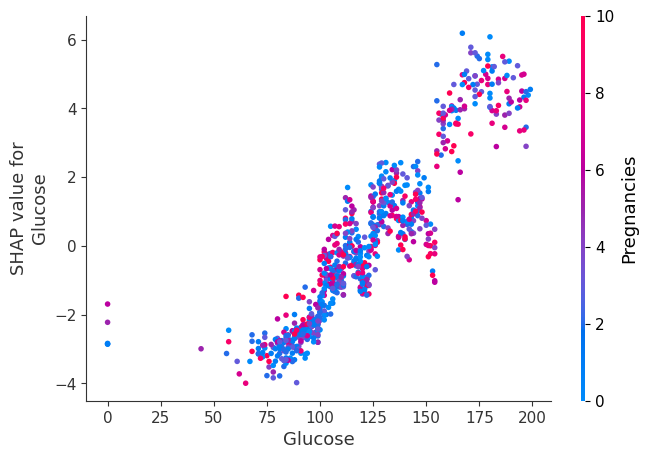

In [55]:
# Step 3: Generate the Dependence Plot for a Specific Feature
# The new `shap_values` object contains `.values` for SHAP values and `.data` for the feature values
shap.dependence_plot("Glucose", shap_values.values, X)

##3. Bar Plot
The bar plot shows the average absolute SHAP values for each feature, highlighting global feature importance.

python

Bar Plot
shap.summary_plot(shap_values, X, plot_type='bar')
Interpretation:
It provides a simpler alternative to the summary plot.
Focuses on the magnitude of the SHAP values (ignoring direction).


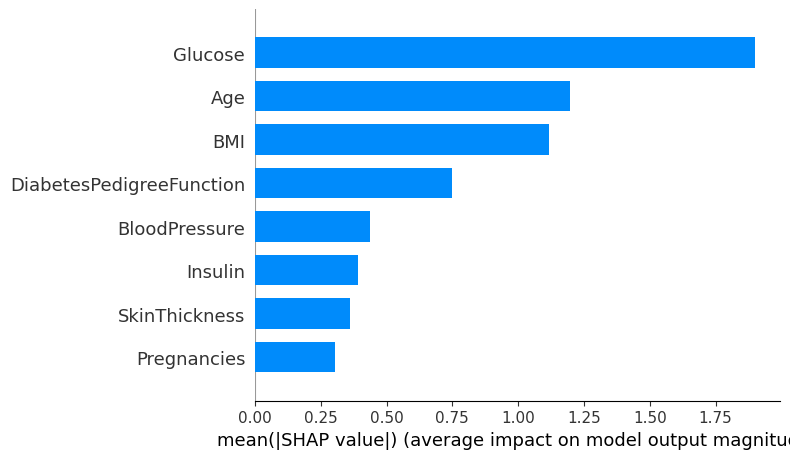

In [56]:
# Bar Plot
shap.summary_plot(shap_values, X, plot_type='bar')


##4. Force Plot (locally)
The force plot explains how each feature contributes to a single prediction. If interactive plots don't work in Colab, use SHAP’s HTML export feature.





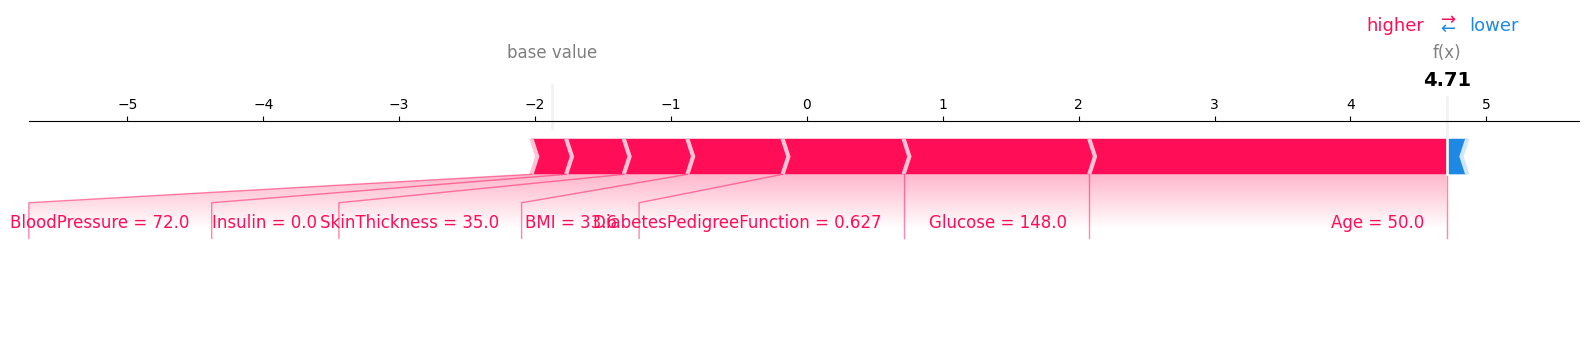

In [57]:
# Force Plot for a Single Prediction
#shap.force_plot(explainer.expected_value, shap_values[0, :], X.iloc[0, :],matplotlib=True) #first sample; 0th index
shap.force_plot(
    base_value=shap_values.base_values[0],  # The base value for the first prediction
    shap_values=shap_values.values[0, :],  # SHAP values for the first sample
    features=X.iloc[0, :],  # Feature values for the first sample
    matplotlib=True  # Use matplotlib for inline plotting
)

plt.show()
# Force plots are used to visualize the impact of each feature on a specific prediction.
# - `explainer.expected_value`: The base value or average prediction of the model.
# - `shap_values[0, :]`: The SHAP values for the first sample in the dataset.
# - `X_test.iloc[0, :]`: The feature values of the first sample from the test dataset.



##5. Waterfall Plot (locally)
The waterfall plot shows a breakdown of how each feature contributes to a single prediction.


Interpretation:
It visualizes the additive nature of SHAP values.
The base value adjusts step-by-step based on feature contributions to reach the final prediction.


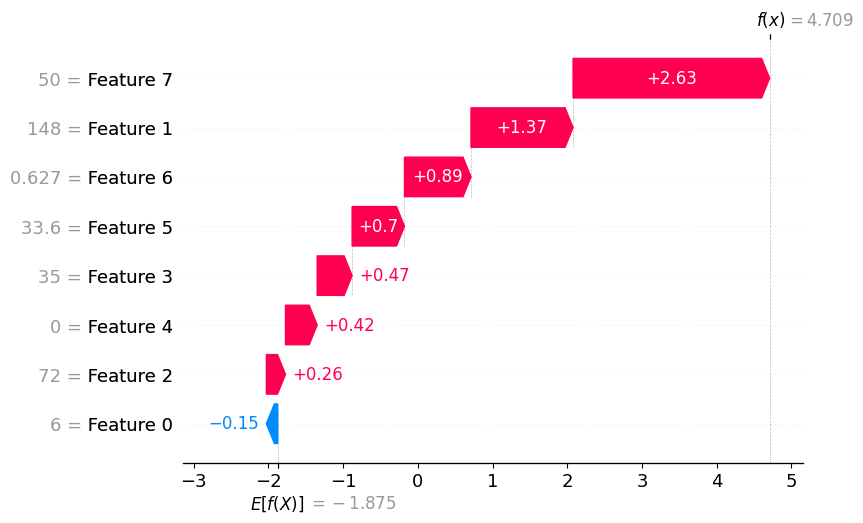

In [58]:
# Waterfall Plot
shap.waterfall_plot(shap.Explanation(values=shap_values[0], base_values=explainer.expected_value, data=X.iloc[0])) #0th index; sample 1



##6. Decision Plot
The decision plot shows how a model makes predictions by combining SHAP values across features. This plot is useful for understanding complex tree-based models.

The x-axis represents the model output.
Each feature contributes to moving the prediction from the base value to the final value.


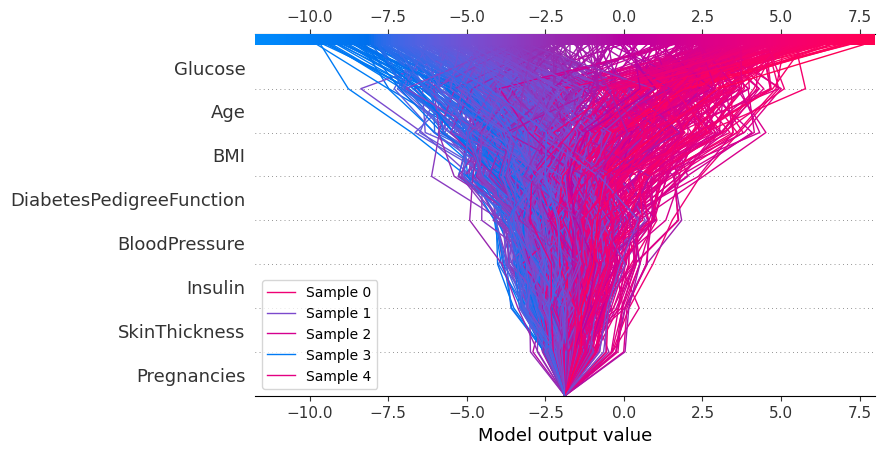

In [59]:
sample_indices=[0,1,2,3,4]
shap.decision_plot(
    base_value=shap_values.base_values[0],  # The base value (expected value)
    shap_values=shap_values.values,  # SHAP values for selected samples
    feature_names=X.columns.tolist(),  # Feature names
    legend_labels=[f"Sample {i}" for i in sample_indices],  # Labels for the selected samples
    return_objects=False  # Set to True if you want matplotlib objects returned
)
plt.show()

##7. Heatmap
The heatmap shows interactions between features and their combined impact on predictions.


Interpretation:
Helps identify strong feature interactions.
Color intensity represents the magnitude of the SHAP value..decision_plot(explainer.expected_value, shap_values, X)
Inter

What the SHAP Heatmap Represents:

- Rows (Samples):

Each row represents a sample (data point) from your dataset.
For example, if you have 100 test samples, the heatmap will have 100 rows.

- Columns (Features):

Each column represents a feature in the dataset.
For example, if you have 8 features (like Age, Glucose), the heatmap will have 8 columns.

- Colors (SHAP Values):

The color intensity indicates the magnitude of the SHAP value (the importance of the feature).
The color itself indicates whether the feature had a positive or negative impact on the prediction:
Red (positive): The feature increased the model's prediction for a specific class.
Blue (negative): The feature decreased the model's prediction for a specific class.

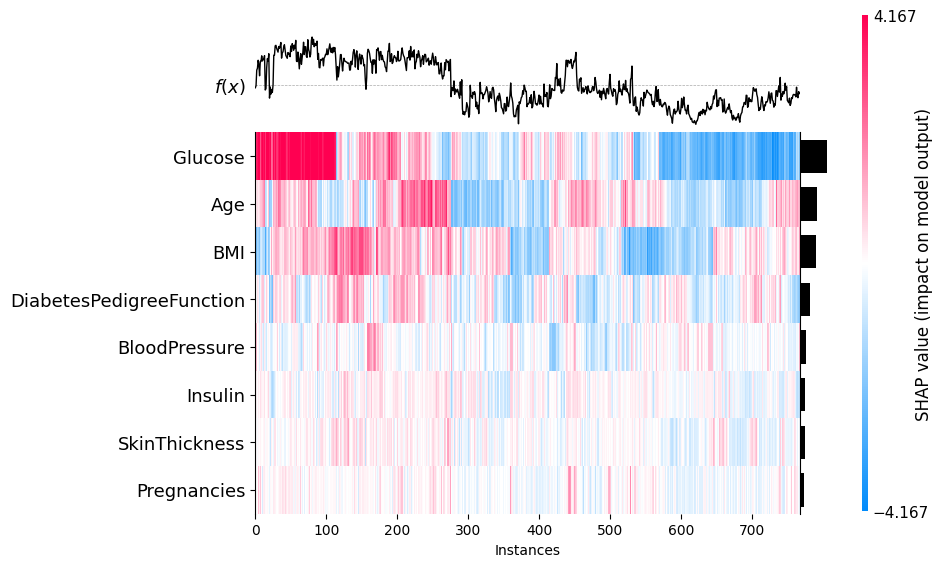

<Axes: xlabel='Instances'>

In [60]:
# Generate the SHAP heatmap for the first 1000 samples
shap.plots.heatmap(shap_values)

Note:
 - The force plot shows how features push the prediction above or below the base value.
- Positive SHAP values push the prediction higher, while negative SHAP values push it lower.
 - `matplotlib=True` might be needed if running this code in Colab or Jupyter to render the plot.

##Partial Dependence Plots
It’s one of the simplest methods to understand how different features interact with each other and with the target. In this method, we change the value of one feature, while keeping others constant and observe the change in the dependent target.

This method allows us to identify regions where the change in feature values has a crucial impact on the prediction.

Method:if we have 100 samples and 10 different values for feature A, we make 100*10 dataset. first we tain model using initial dataset. and then we find the predictions from that trained model for this new dataset(100*10). we average the output predictions for each value of A(100 samples for each A value) and get an idea how predictions change with change of A.

The Python partial dependence plot toolbox or PDPbox is a package that provides functions to visualize these. In the same case of diabetes prediction, let us see how to plot partial dependence plots for a single feature:

In [61]:
 #pip install pdpbox

In [62]:
X_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
351,4,137,84,0,0,31.2,0.252,30
210,2,81,60,22,0,27.7,0.290,25
148,5,147,78,0,0,33.7,0.218,65
44,7,159,64,0,0,27.4,0.294,40
356,1,125,50,40,167,33.3,0.962,28


In [63]:
y_test.head()

,Outcome
351,0
210,0
148,0
44,0
356,1


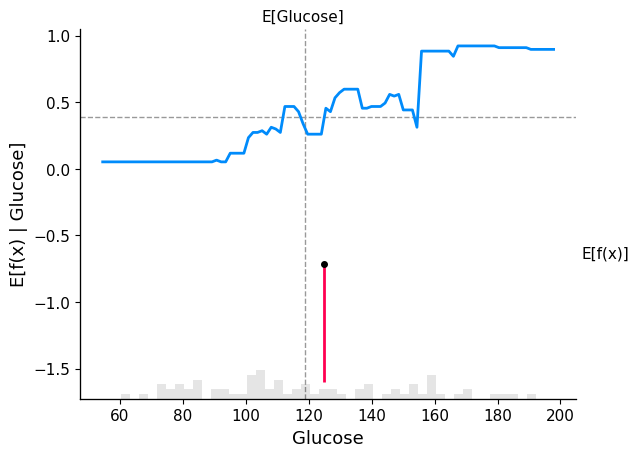

In [64]:
# train XGBoost model
import xgboost

# # make a standard partial dependence plot
sample_ind = 4

# make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "Glucose",
    model.predict,
    X_test,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=False,
    shap_values=shap_values_xgb[sample_ind : sample_ind + 1, :],
)

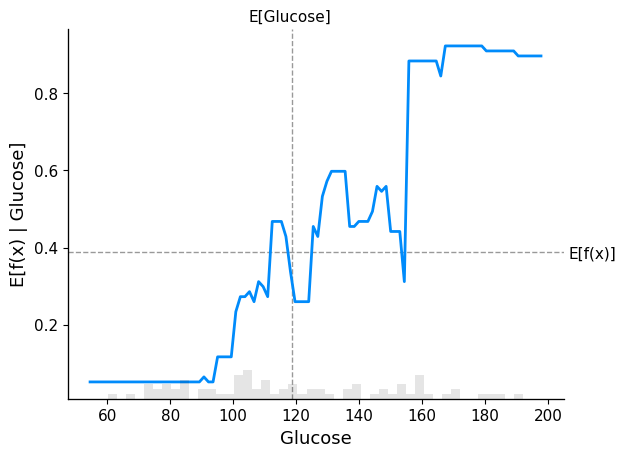

In [65]:
# Select a specific sample index to analyze
sample_ind = 4

# Make a standard partial dependence plot with a single SHAP value overlaid
fig, ax = shap.partial_dependence_plot(
    "Glucose",
    model.predict,  # The model's prediction method
    X_test,  # The dataset used for partial dependence
    model_expected_value=True,  # Include the model's expected value in the plot
    feature_expected_value=True,  # Include the feature's expected value in the plot
    show=False,  # Do not display the plot immediately
    ice=False,  # Disable Individual Conditional Expectation (ICE) curves
    #shap_values=shap_values_xgb[sample_ind:sample_ind + 1, :]  # Use SHAP values for the selected sample
)

# Show the plot
plt.show()


####using plotly


In [66]:
import shap
import numpy as np
import plotly.graph_objects as go

# Step 3: Generate Partial Dependence Data for "Glucose"
feature_name = "Glucose"
feature_index = list(X_test.columns).index(feature_name)

# Generate a range of values for the feature
glucose_range = np.linspace(X_test[feature_name].min(), X_test[feature_name].max(), 100)

# Predict the model's output for varying values of "Glucose" while keeping other features constant
mean_feature_values = X_test.mean(axis=0)
pdp_data = []
for val in glucose_range:
    temp_input = mean_feature_values.copy()
    temp_input[feature_name] = val
    pdp_data.append(model.predict_proba([temp_input])[0][1])  # Predicted probability for class 1

# Step 4: Overlay a single SHAP explanation on the PDP
sample_ind = 4  # Index of the sample to overlay
sample_shap_values = shap_values_xgb.values[sample_ind, feature_index]
sample_glucose = X_test.iloc[sample_ind, feature_index]

# Step 5: Plot PDP with Plotly
fig = go.Figure()

# Add PDP line
fig.add_trace(
    go.Scatter(
        x=glucose_range,
        y=pdp_data,
        mode="lines",
        name="PDP for Glucose",
        line=dict(color="blue"),
    )
)

# Add SHAP value overlay
fig.add_trace(
    go.Scatter(
        x=[sample_glucose],
        y=[pdp_data[np.argmin(abs(glucose_range - sample_glucose))]],
        mode="markers",
        name="Sample SHAP Overlay",
        marker=dict(size=10, color="orange"),
    )
)

# Update layout
fig.update_layout(
    title="Partial Dependence Plot with SHAP Overlay for Glucose",
    xaxis_title="Glucose",
    yaxis_title="Predicted Probability",
    legend_title="Legend",
    template="plotly_white",
)

# Show the plot
fig.show()


In [67]:
# from sklearn.inspection import plot_partial_dependence
# import matplotlib.pyplot as plt

# # Plot PDP for the 'Glucose' feature
# plot_partial_dependence(model, X_test, ['Glucose'])
# plt.show()


##scatter plot(Globally)

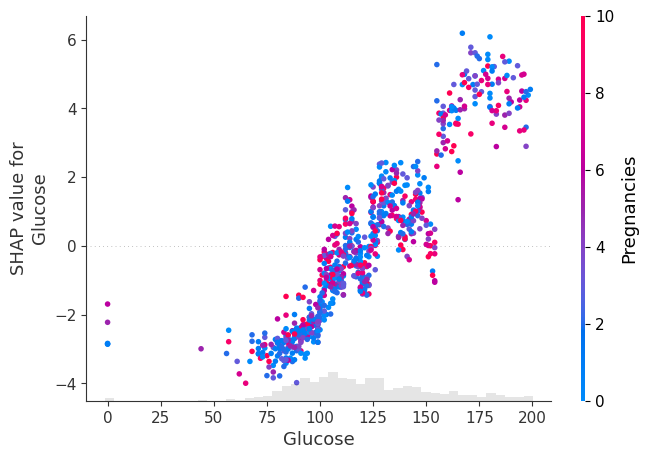

In [68]:
shap.plots.scatter(shap_values[:,"Glucose"], color=shap_values)

##average shap value

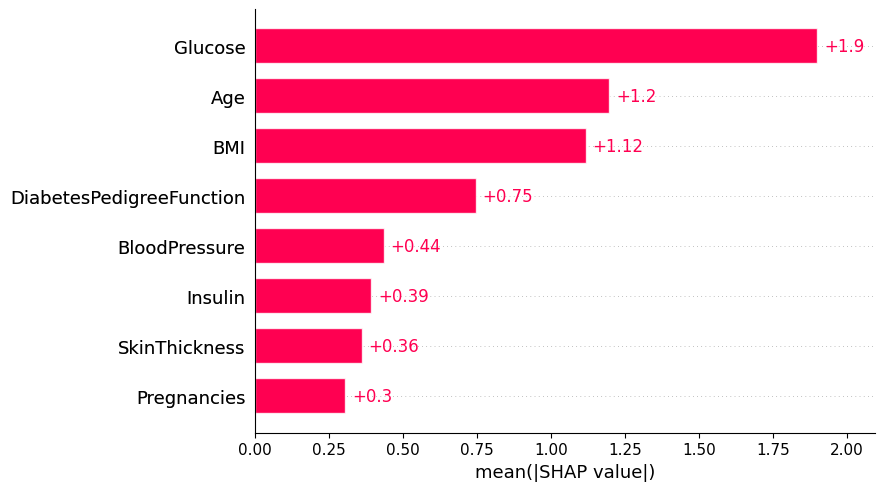

In [69]:
shap.plots.bar(shap_values)

##maximun shap value

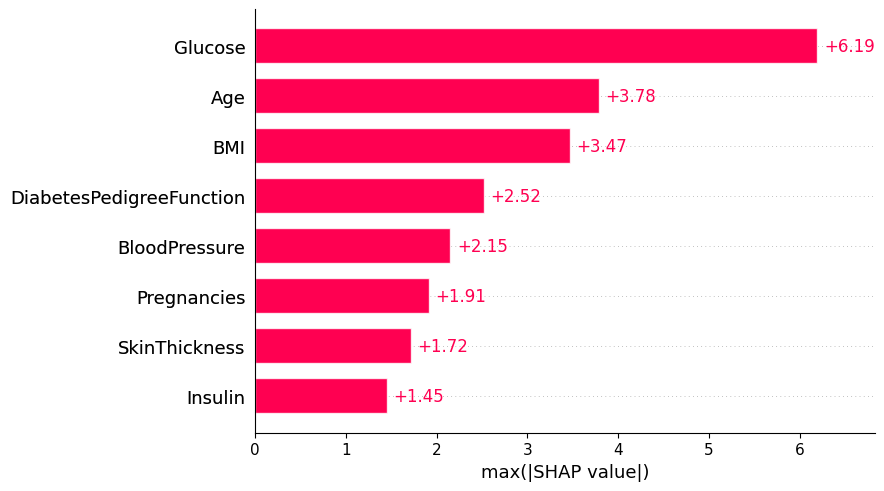

In [70]:
shap.plots.bar(shap_values.abs.max(0))

##beeswarm plot

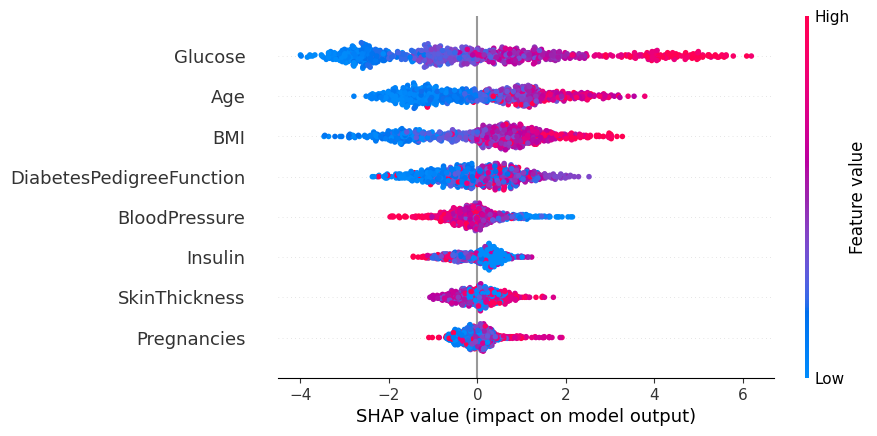

In [71]:
shap.plots.beeswarm(shap_values)

#Permutation Feature Importance
It is a simple and intuitive method to find the feature importance and ranking for non-linear black box models. In this method, we randomly shuffle or change the value of a single feature, while the remaining features are constant.
Then, we check the model performance using relevant metrics such as accuracy, RMSE, etc., done iteratively for all the features. The larger the drop in performance after shuffling a feature, the more significant it is.


If shuffling a feature has a very low impact, we can even **drop the variable to reduce noise**

Purpose:
Quantifies how much each feature contributes to the model's predictive performance.

How it works:

Shuffle the values of one feature in the dataset.
Measure how much the model's performance metric (e.g., accuracy, R²) decreases due to the shuffling.
A large drop in performance indicates the feature is important to the model.

Output:
A score (e.g., mean decrease in performance) for each feature, indicating its importance.

Use case:
Determine which features are the most important in making predictions.
 can compute the permutation feature importance in a few simple steps using the Tree Interpreter or ELI5 library.

In [72]:

from sklearn.inspection import permutation_importance
import plotly.express as px
from sklearn.base import BaseEstimator, ClassifierMixin


# Step 2: Define Custom Wrapper for XGBoost :Wrapper Class: Ensures compatibility between XGBClassifier and scikit-learn utilities.
class XGBSklearnWrapper(BaseEstimator, ClassifierMixin):

    # The constructor (__init__) initializes the XGBClassifier model with any additional parameters passed through kwargs
    def __init__(self, **kwargs):
        # XGBClassifier is a specialized implementation of gradient boosting for classification tasks
        # kwargs allows you to pass any hyperparameters to the model
        self.model = XGBClassifier(**kwargs)

    # Fit method trains the model using the training data (X) and labels (y)
    def fit(self, X, y):
        # Fit the model on the training data (X, y)
        self.model.fit(X, y)
        # Return self to allow for chaining (as per scikit-learn's conventions)
        return self

    # Predict method is used to generate class predictions for the given data (X)
    def predict(self, X):
        # The model will predict the class label for each sample in X
        return self.model.predict(X)

    # predict_proba method returns predicted probabilities for each class (in a classification task)
    def predict_proba(self, X):
        # The model will predict the probabilities of each class for each sample in X
        return self.model.predict_proba(X)

# Step 3: Initialize and Train the Model
model = XGBSklearnWrapper(random_state=42)
model.fit(X_train, y_train)

# Step 4: Calculate Permutation Feature Importance
result = permutation_importance(
    estimator=model,
    X=X_test,
    y=y_test,
    scoring="accuracy",
    n_repeats=10,
    random_state=42,
)

# Step 5: Convert Results to a DataFrame
importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Mean Importance": result.importances_mean,
    "Importance StdDev": result.importances_std
}).sort_values(by="Mean Importance", ascending=False)

# Step 6: Visualize with Plotly
fig = px.bar(
    importance_df,
    x="Mean Importance",
    y="Feature",
    error_x="Importance StdDev",
    orientation="h",
    title="Permutation Feature Importance",
    labels={"Mean Importance": "Mean Importance", "Feature": "Features"},
    template="plotly_white"
)

# Show the plot
fig.show()


#LIME
Local Interpretable Model-Agnostic Explanations (LIME) is widely used to explain black box models at a local level. When we have complex models like CNNs, LIME uses a simple, explainable model to understand its prediction.

To make it even easier to understand, let’s see how LIME works in a step-wise manner:

Define your local point: Choose a specific prediction you want to explain (e.g., why an image was classified as a cat by a CNN).

Generate variations: Create slight variations of the input data (e.g., slightly modified pixels in the image).

Predict with the original model: Pass the input to CNN and get the predicted output class for each variation.

Build an explainer model: Train a simple linear model to explain the relationship between the variations and the model’s predictions.

Interpret the explainer: Now, you can interpret the explainer model with any method like feature importance, PDP, etc. to understand which features played a crucial role in the original prediction.
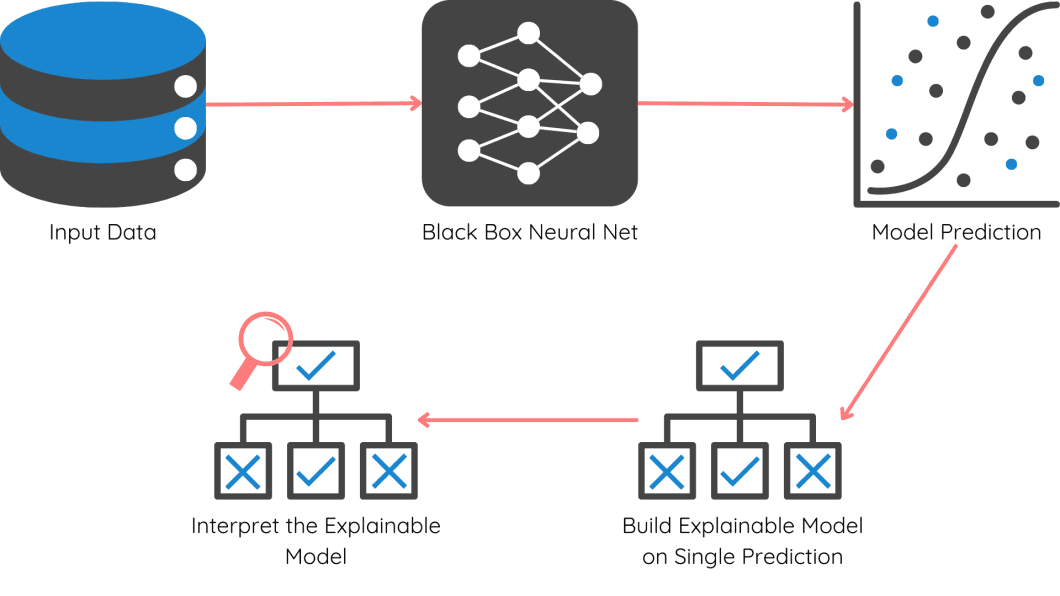

In [73]:
#!pip install lime

Set up LIME with XGBoost model; need to use LimeTabularExplainer from LIME to explain the XGBoost predictions. The LimeTabularExplainer works for tabular datasets, and it approximates the decision boundary of the model locally.

**Detailed Explanation:**
Initialize LimeTabularExplainer:

training_data: This is the dataset used to train the model. It’s required in a NumPy array or pandas DataFrame format.

training_labels: These are the corresponding target labels (the outcome variable) for the training data.


mode: Whether the model is used for classification or regression. Since you’re using a classification model (XGBoost classifier), set it to 'classification'.
feature_names: List of feature names, which is typically obtained from X_train.columns.


class_names: Class names are passed here to identify the labels for the model. This can be fetched from model.classes_ if you're using scikit-learn-compatible models.


discretize_continuous: This option is for handling continuous features by discretizing them for better interpretability in LIME.
Choose an instance to explain:


You select an instance (a single sample from X_test) that you want to explain. In the example, I’ve chosen the first sample (sample_index = 0), but you can choose any instance.


**Generate the explanation:**


The explain_instance method generates a local explanation for the chosen instance.
The model's predict_proba method is passed to explain_instance to get class probabilities for the prediction.
The num_features parameter controls how many features you want to display in the explanation.


Display the explanation:


show_in_notebook: This function displays the explanation in the notebook, including a table of feature importance and visualizations.
as_pyplot_figure(): Alternatively, this generates a visualization of the explanation as a plot.


**Notes:**


The LIME explanation approximates the model locally by training a simpler model (like a linear model) on a small, neighborhood-specific dataset around the selected instance. It shows how the features affect the model's prediction for that specific instance.


This is useful when you want to understand how the model's prediction changes based on a particular set of features or why the model made a certain decision for a sample.


Visualizing the explanation:
LIME's output includes: **bold text**


Feature Importance Table: Displays the importance of each feature to the prediction for the selected instance.
Plot: A bar chart that visualizes how each feature influences the model’s decision for that particular prediction.

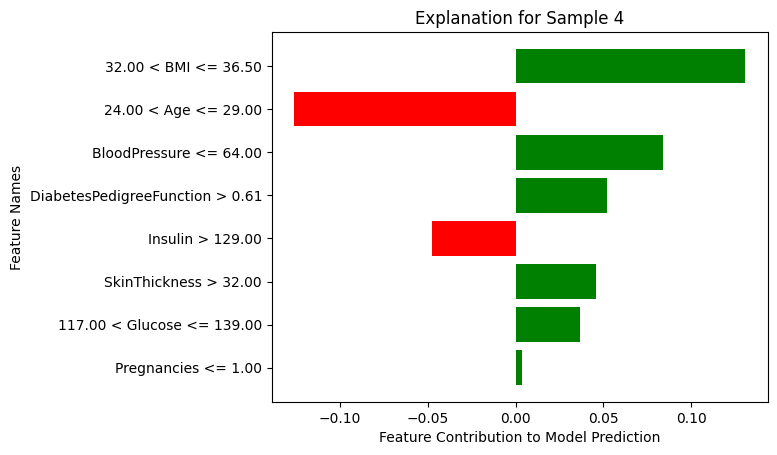

In [81]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import numpy as np
import matplotlib.pyplot as plt

# Assuming the model and X_train, y_train are already defined
# Ensure that the model is wrapped with the XGBSklearnWrapper if needed

# Step 1: Initialize the LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Training data (numpy array or pandas dataframe)
    training_labels=y_train.values,  # Target labels (same number of samples as X_train)
    mode='classification',  # Type of prediction (classification)
    feature_names=X_train.columns.tolist(),  # Feature names
    class_names=[str(i) for i in model.model.classes_],  # Class labels from the model
    discretize_continuous=True,  # Discretize continuous features for better explanation
)

# Step 2: Select an instance for which you want to explain the prediction
sample_index = 4  # You can change this index to any sample in your test set
sample = X_test.iloc[sample_index]

# Step 3: Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    sample.values,  # Feature values of the selected instance
    model.predict_proba,  # Use the predict_proba function of the model
    num_features=10  # Limit the explanation to the top 5 most important features
)

# Step 4: Display the explanation in a notebook-friendly format with a table
explanation.show_in_notebook(show_table=True, show_all=False)

# Step 5: Visualize the explanation using a bar plot
fig = explanation.as_pyplot_figure()

# Add labels and title to the plot
plt.title(f"Explanation for Sample {sample_index}")
plt.xlabel("Feature Contribution to Model Prediction")
plt.ylabel("Feature Names")

# Display the plot
plt.show()

In [80]:
import lime
from lime.lime_tabular import LimeTabularExplainer
import plotly.graph_objects as go

# Step 1: Initialize the LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,  # Training data (numpy array or pandas dataframe)
    training_labels=y_train.values,  # Target labels (same number of samples as X_train)
    mode='classification',  # Type of prediction (classification)
    feature_names=X_train.columns.tolist(),  # Feature names
    class_names=[str(i) for i in model.model.classes_],  # Class labels from the model
    discretize_continuous=True,  # Discretize continuous features for better explanation
)

# Step 2: Select an instance for which you want to explain the prediction
sample_index = 4  # You can change this index to any sample in your test set
sample = X_test.iloc[sample_index]

# Step 3: Explain the prediction for the selected instance
explanation = explainer.explain_instance(
    sample.values,  # Feature values of the selected instance
    model.predict_proba,  # Use the predict_proba function of the model
    num_features=5  # Limit the explanation to the top 5 most important features
)

# Step 4: Convert the explanation to a format suitable for Plotly visualization
# Get the feature names and their contributions (importance)
features = explanation.as_list()

# Extract feature names and contributions (importance)
feature_names = [f[0] for f in features]
importances = [f[1] for f in features]

# Step 5: Create the Plotly bar plot for feature importance
fig = go.Figure(
    data=[
        go.Bar(
            x=feature_names,  # Feature names
            y=importances,  # Importance values
            text=importances,  # Show the importance values on hover
            textposition='auto',
            marker=dict(color='blue'),
        )
    ]
)

# Step 6: Customize the layout of the Plotly plot
fig.update_layout(
    title=f"LIME Explanation for Sample {sample_index}",
    xaxis_title="Features",
    yaxis_title="Feature Contribution",
    template="plotly_white",
    showlegend=False
)

# Step 7: Display the Plotly plot
fig.show()
